Activity 6

1)X-y split.

2)Normalize (numerical).

3)One Hot/Label Encoding (categorical).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 200)
## to make it possible to display multiple output inside one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
vehicles_df= pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv") ## Your Code here

vehicles_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
def drop_columns(vehicles_df):
    vehicles_df.drop(columns=["Unnamed: 0"], inplace=True)
    return vehicles_df

In [5]:
vehicles_df.drop_duplicates() #remove duplicate rows

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [6]:
drop_columns(vehicles_df)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [7]:
vehicles_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [8]:
categoricals_features= vehicles_df.select_dtypes("object")
categoricals_features

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [20]:
X=vehicles_df.drop('Total Claim Amount', axis=1)
y=vehicles_df['Total Claim Amount']

In [42]:
X=X._get_numeric_data()
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,4809.216960,48029,61,7.000000,52,0.000000,9
1,2228.525238,0,64,3.000000,26,0.000000,1
2,14947.917300,22139,100,34.000000,31,0.000000,2
3,22332.439460,49078,97,10.000000,3,0.000000,2
4,9025.067525,23675,117,37536.284785,31,0.384256,7
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,37536.284785,40,0.384256,7
10906,5259.444853,61146,65,7.000000,68,0.000000,6
10907,23893.304100,39837,201,11.000000,63,0.000000,2
10908,11971.977650,64195,158,0.000000,27,4.000000,6


In [44]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [21]:
mean_customer = np.mean(vehicles_df['Customer Lifetime Value']) # Replacing null values with means of the column (for numerical columns)
vehicles_df['Customer Lifetime Value'] = vehicles_df['Customer Lifetime Value'].fillna(mean_customer)

In [22]:
mean_income = np.mean(vehicles_df['Income'])
vehicles_df['Income'] = vehicles_df['Income'].fillna(mean_income)

In [23]:
mean_premium = np.mean(vehicles_df['Monthly Premium Auto'])
vehicles_df['Monthly Premium Auto'] = vehicles_df['Monthly Premium Auto'].fillna(mean_income)

In [24]:
mean_premium = np.mean(vehicles_df['Months Since Last Claim'])
vehicles_df['Months Since Last Claim'] = vehicles_df['Months Since Last Claim'].fillna(mean_income)

In [25]:
mean_premium = np.mean(vehicles_df['Months Since Policy Inception'])
vehicles_df['Months Since Policy Inception'] = vehicles_df['Months Since Policy Inception'].fillna(mean_income)

In [26]:
mean_complaints = np.mean(vehicles_df['Number of Open Complaints'])
vehicles_df['Number of Open Complaints'] = vehicles_df['Number of Open Complaints'].fillna(mean_complaints)

In [27]:
mean_claim = np.mean(vehicles_df['Number of Policies'])
vehicles_df['Number of Policies'] = vehicles_df['Number of Policies'].fillna(mean_claim)

In [28]:
vehicles_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


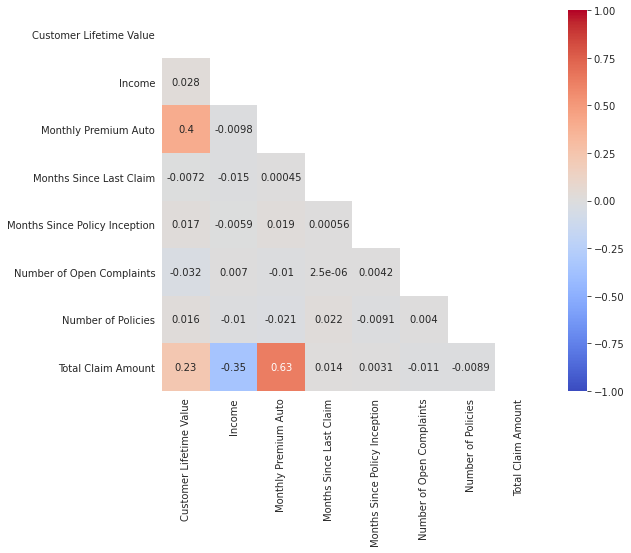

In [29]:
# plotting the correlation heatmap
corr = vehicles_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [30]:
# Highly Correlated Columns
corr_matrix=vehicles_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

[]

array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly Premium Auto'}>],
       [<AxesSubplot:title={'center':'Months Since Last Claim'}>,
        <AxesSubplot:title={'center':'Months Since Policy Inception'}>,
        <AxesSubplot:title={'center':'Number of Open Complaints'}>],
       [<AxesSubplot:title={'center':'Number of Policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

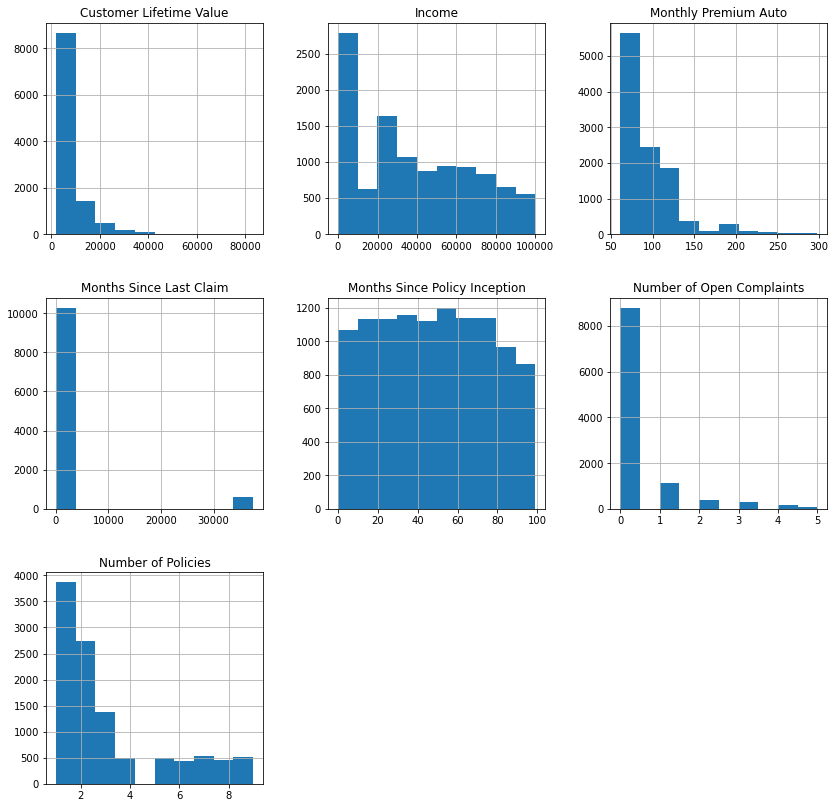

In [31]:
X.hist(figsize=(14,14))

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

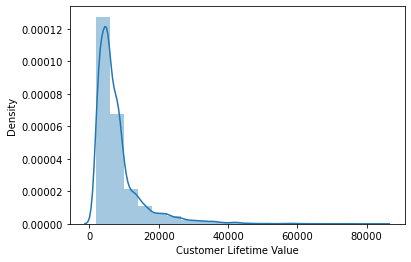

In [34]:
sns.distplot((vehicles_df["Customer Lifetime Value"]), bins=20)

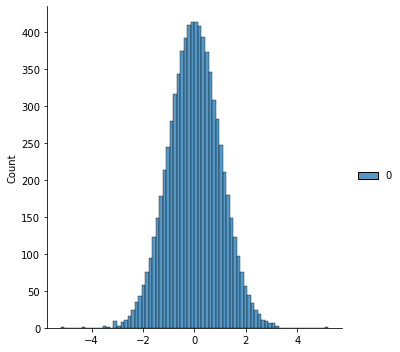

In [45]:
qt = QuantileTransformer(output_distribution='normal')
normalized_income=qt.fit_transform(X_train["Customer Lifetime Value"].to_numpy().reshape(-1,1))
sns.displot(normalized_income)

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

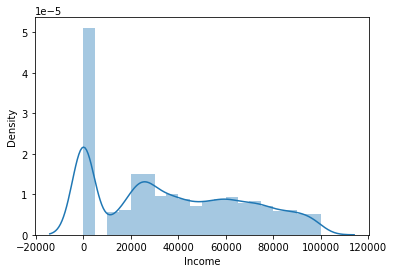

In [36]:
sns.distplot((vehicles_df["Income"]), bins=20)

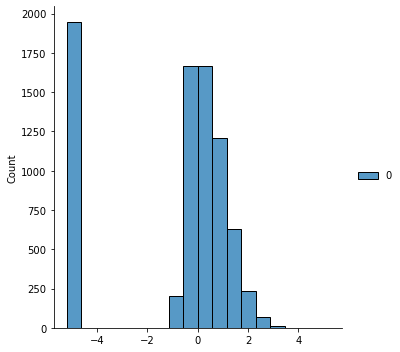

In [46]:
qt = QuantileTransformer(output_distribution='normal')
normalized_income=qt.fit_transform(X_train["Income"].to_numpy().reshape(-1,1))
sns.displot(normalized_income)

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

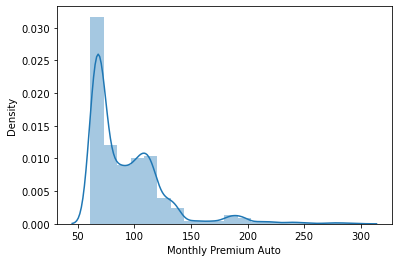

In [37]:
sns.distplot((vehicles_df["Monthly Premium Auto"]), bins=20)

In [ ]:
qt = QuantileTransformer(output_distribution='normal')
normalized_income=qt.fit_transform(X_train["Monthly Premium Auto"].to_numpy().reshape(-1,1))
sns.displot(normalized_income)

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Months Since Last Claim', ylabel='Density'>

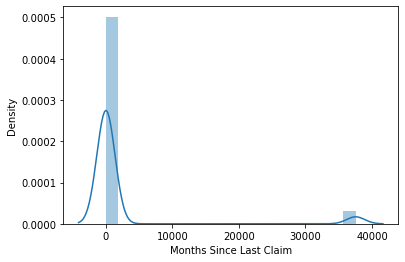

In [47]:
sns.distplot((vehicles_df["Months Since Last Claim"]), bins=20)

In [ ]:
qt = QuantileTransformer(output_distribution='normal')
normalized_income=qt.fit_transform(X_train["Months Since Last Claim"].to_numpy().reshape(-1,1))
sns.displot(normalized_income)

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Density'>

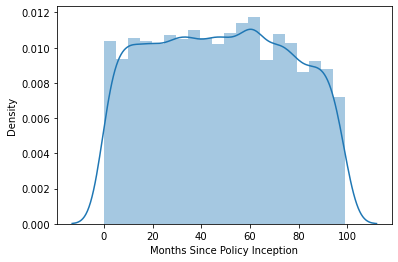

In [39]:
sns.distplot((vehicles_df["Months Since Policy Inception"]), bins=20)

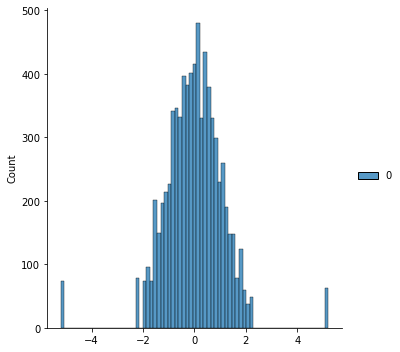

In [48]:
qt = QuantileTransformer(output_distribution='normal')
normalized_income=qt.fit_transform(X_train["Months Since Policy Inception"].to_numpy().reshape(-1,1))
sns.displot(normalized_income)

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of Open Complaints', ylabel='Density'>

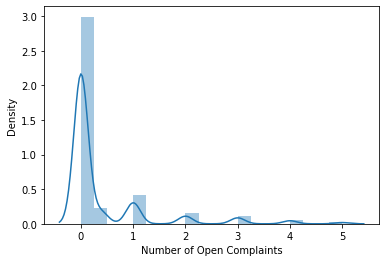

In [40]:
sns.distplot((vehicles_df["Number of Open Complaints"]), bins=20)

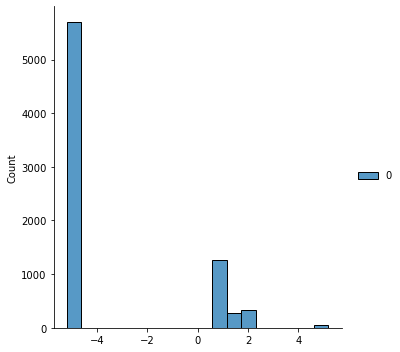

In [49]:
qt = QuantileTransformer(output_distribution='normal')
normalized_income=qt.fit_transform(X_train["Number of Open Complaints"].to_numpy().reshape(-1,1))
sns.displot(normalized_income)

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of Policies', ylabel='Density'>

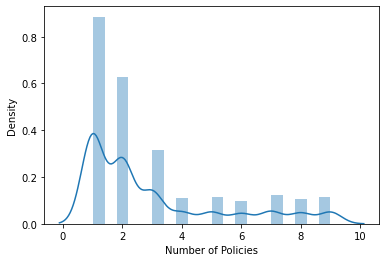

In [41]:
sns.distplot((vehicles_df["Number of Policies"]), bins=20)

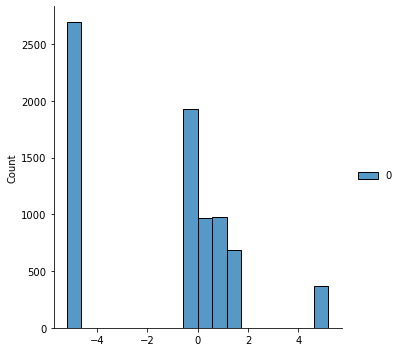

In [50]:
qt = QuantileTransformer(output_distribution='normal')
normalized_income=qt.fit_transform(X_train["Number of Policies"].to_numpy().reshape(-1,1))
sns.displot(normalized_income)

# Modelling

Data splitting

In [51]:
X=vehicles_df.drop('Total Claim Amount', axis=1)
y=vehicles_df['Total Claim Amount']

In [52]:
X=X._get_numeric_data()
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,4809.216960,48029,61,7.000000,52,0.000000,9
1,2228.525238,0,64,3.000000,26,0.000000,1
2,14947.917300,22139,100,34.000000,31,0.000000,2
3,22332.439460,49078,97,10.000000,3,0.000000,2
4,9025.067525,23675,117,37536.284785,31,0.384256,7
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,37536.284785,40,0.384256,7
10906,5259.444853,61146,65,7.000000,68,0.000000,6
10907,23893.304100,39837,201,11.000000,63,0.000000,2
10908,11971.977650,64195,158,0.000000,27,4.000000,6


In [53]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

Standardize

In [54]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [55]:
X_test_scaled=std_scaler.transform(X_test)

In [56]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-6.70129508e-01 -1.57745846e-01 -1.77408046e-01 ... -1.01395735e-02
  -4.35148034e-01 -8.23324989e-01]
 [ 3.04436074e+00 -6.73756585e-02  4.22263292e+00 ... -1.00885254e+00
  -4.35148034e-01 -4.08347894e-01]
 [-7.21338256e-02  1.94886007e+00  5.41730577e-02 ... -1.11585750e+00
   7.04866605e-01  1.25156048e+00]
 ...
 [ 9.78796193e-01 -1.24145930e+00  1.32786913e+00 ...  2.75206987e-01
  -4.35148034e-01 -4.08347894e-01]
 [ 5.21054160e+00 -4.72815806e-01  1.12523566e+00 ...  8.10231789e-01
   2.90955171e-03 -4.08347894e-01]
 [-8.01183967e-01  1.30040098e+00 -8.43203718e-01 ...  7.03226828e-01
  -4.35148034e-01 -8.23324989e-01]]
--------
[[-0.82006016 -1.2414593  -0.61162261 ... -1.57954566 -0.43514803
  -0.82332499]
 [-0.28953319 -0.56580302 -0.49583206 ...  0.41788027  0.7048666
   0.4216063 ]
 [-0.38514774  1.11671231 -0.7563608  ... -1.22286246 -0.43514803
   1.25156048]
 ...
 [-0.74223931  1.42823769 -0.55372734 ... -1.61521398 -0.43514803
  -0.82332499]
 [ 0.63136522 -0.03802522  

In [57]:
vehicles_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


Apply Linear Regression

In [58]:
X.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies'],
      dtype='object')

Modeling using Statsmodels

In [59]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1159.
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:47:39   Log-Likelihood:                -51408.
No. Observations:                7637   AIC:                         1.028e+05
Df Residuals:                    7629   BIC:                         1.029e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        434.1323      2.323    186.922      0.0

In [60]:
predictions_test

array([458.0681992 , 397.90497062, 191.43628691, ..., 199.01035496,
       771.34240739, 745.85311481])

In [61]:
y_test

1183     518.400000
2111     364.800000
7971      29.984815
7189     166.937747
3103     556.800000
           ...     
5104     350.400000
1632     934.656068
9488      97.928632
1303     388.148089
2226    1176.285998
Name: Total Claim Amount, Length: 3273, dtype: float64

In [62]:
pd.DataFrame(predictions_test)

,0
0,458.068199
1,397.904971
2,191.436287
3,506.282718
4,506.630864
...,...
3268,374.844543
3269,652.613933
3270,199.010355
3271,771.342407


In [63]:
#display adjusted R-squared
print(model.rsquared_adj)

0.5148542301280981


Modeling using Scikit Learn

Model fitting

In [64]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

model parameters ( b1,b2,b3,b4)

In [65]:
model.coef_

array([  -3.38122523, -100.99762259,  183.96640645,    0.44031433,
         -5.25672283,   -1.61180024,    0.72823545])

In [66]:
model.intercept_

434.1323053463402

In [67]:
# y= -3.38 * Customer Lifetime Value -100.99 * Income +183.96 * Monthly Premium Auto +0.44 * Months Since Last Claim
# - 5.25 * Months Since Policy Inception -1.61 * Number Of Complaints +0.72 * Numbers of Policies 

Making prediction

In [68]:
y_pred=model.predict(X_test_scaled)   # model prediction
##y_pred_train=model.predict(X_train_scaled)

In [69]:
y_test

1183     518.400000
2111     364.800000
7971      29.984815
7189     166.937747
3103     556.800000
           ...     
5104     350.400000
1632     934.656068
9488      97.928632
1303     388.148089
2226    1176.285998
Name: Total Claim Amount, Length: 3273, dtype: float64

In [70]:
y_pred

array([458.0681992 , 397.90497062, 191.43628691, ..., 199.01035496,
       771.34240739, 745.85311481])

In [71]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

Text(0.5, 0, 'y_test')

Text(0, 0.5, 'y_pred')

Text(0.5, 1.0, 'Test Set -Predicted vs real')

(array([8.000e+00, 5.100e+01, 4.310e+02, 1.916e+03, 7.400e+02, 1.030e+02,
        1.500e+01, 5.000e+00, 3.000e+00, 1.000e+00]),
 array([-946.19664969, -685.78134583, -425.36604197, -164.9507381 ,
          95.46456576,  355.87986963,  616.29517349,  876.71047735,
        1137.12578122, 1397.54108508, 1657.95638895]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Test y-y_pred')

Text(0.5, 1.0, 'Test Set Residual histogram')

Text(0.5, 0, 'predited')

Text(0, 0.5, 'residuals')

Text(0.5, 1.0, 'Residuals by Predicted')

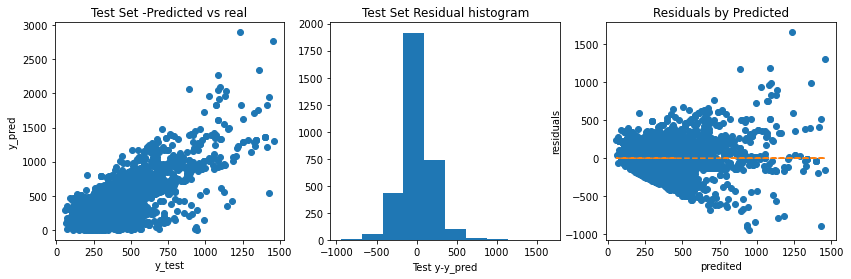

In [72]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [73]:
# <b>more fancy using seaborn

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

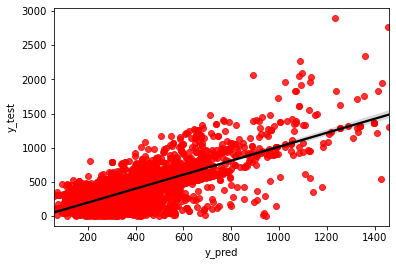

In [74]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [75]:
# <b> Error metrics

In [76]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

40432.05312998512
144.12174398682964


In [77]:
R2=r2_score(y_test,y_pred)
R2

0.5321962502509696

In [78]:
X_test.shape[1]

7

In [79]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.5311933019360406

#### Feature Importance

In [80]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [81]:
features_importances

,Attribute,Importance
2,Monthly Premium Auto,183.966406
1,Income,100.997623
4,Months Since Policy Inception,5.256723
0,Customer Lifetime Value,3.381225
5,Number of Open Complaints,1.611800
6,Number of Policies,0.728235
3,Months Since Last Claim,0.440314


<BarContainer object of 7 artists>

Text(0.5, 1.0, 'Feature importances obtained from coefficients')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

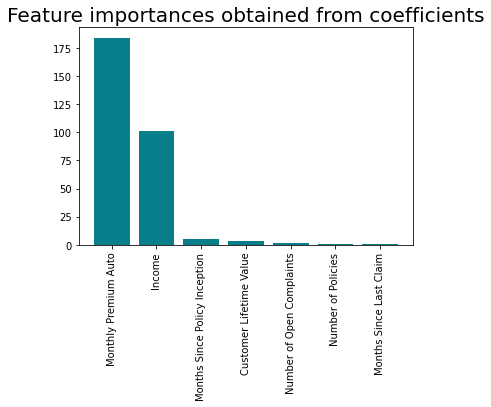

In [82]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [83]:
vehicles_df.State.value_counts()
vehicles_df.Response.value_counts()
vehicles_df.Coverage.value_counts()
vehicles_df.Education.value_counts()
vehicles_df["EmploymentStatus"].value_counts()
vehicles_df.Gender.value_counts()
vehicles_df["Location Code"].value_counts()
vehicles_df["Marital Status"].value_counts()
vehicles_df["Policy Type"].value_counts()
vehicles_df.Policy.value_counts()
vehicles_df["Renew Offer Type"].value_counts()
vehicles_df["Sales Channel"].value_counts()
vehicles_df["Vehicle Class"].value_counts()
vehicles_df["Vehicle Size"].value_counts()
vehicles_df["Vehicle Type"].value_counts()

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: State, dtype: int64

No     8813
Yes    1466
Name: Response, dtype: int64

Basic       6660
Extended    3265
Premium      985
Name: Coverage, dtype: int64

Bachelor                3272
College                 3204
High School or Below    3146
Master                   887
Doctor                   401
Name: Education, dtype: int64

Employed         6789
Unemployed       2787
Medical Leave     504
Disabled          499
Retired           331
Name: EmploymentStatus, dtype: int64

F    5573
M    5337
Name: Gender, dtype: int64

Suburban    6902
Rural       2116
Urban       1892
Name: Location Code, dtype: int64

Married     6319
Single      2958
Divorced    1633
Name: Marital Status, dtype: int64

Personal Auto     8128
Corporate Auto    2341
Special Auto       441
Name: Policy Type, dtype: int64

Personal L3     4118
Personal L2     2537
Personal L1     1473
Corporate L3    1221
Corporate L2     688
Corporate L1     432
Special L2       193
Special L3       170
Special L1        78
Name: Policy, dtype: int64

Offer1    4483
Offer2    3490
Offer3    1732
Offer4    1205
Name: Renew Offer Type, dtype: int64

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: Sales Channel, dtype: int64

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: Vehicle Class, dtype: int64

Medsize    7251
Small      1966
Large      1071
Name: Vehicle Size, dtype: int64

A    5428
Name: Vehicle Type, dtype: int64

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["State"])

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Response"])

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Coverage"])

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Education"])

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["EmploymentStatus"])

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Gender"],drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Location Code"])

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Marital Status"])

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Policy Type"])

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Renew Offer Type"])

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Sales Channel"])

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Vehicle Class"])

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Vehicle Size"])

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Vehicle Type"])

Activity 7

A) Linear Regression

Train-test split.

Standardize the data (after the data split).

Apply linear regression.

Model Interpretation.

Model Validation

B) Model Evaluation:

MSE.

RMSE.

MAE.

R2.
Adjusted R2.
Feature Importance.